# ОИАД. Лабораторная работа №1

In [1]:
N = 10
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Screen_Time_Before_Bed'

# I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс

**Определение:** эксцесс = центральный 4-й момент нормированный и уменьшенный на 3:

$$
\text{excess} = \frac{E[(X-\mu)^4]}{\sigma^4} - 3
$$

(отнимаем 3, чтобы у нормального распределения эксцесс = 0).

**Что значит:** показывает «пиковость» и «толстоту хвостов».

* Положительный эксцесс → более «тяжёлые хвосты» и/или более высокий пик, чем у нормального распределения (больше выбросов).
* Отрицательный → «плоское» распределение, менее вероятны очень большие отклонения.

**Python:** `scipy.stats.kurtosis(a, fisher=True, bias=True)`

* `fisher=True` - вернуть **эксцесс** (т.е. subtract 3). Если `False`, возвращается классический момент (без вычитания 3).
* `bias` - если `bias=False`, применяется поправка на смещение выборочного оценивателя; `bias=True` - без поправки. По-умолчанию в SciPy `bias=True`.
   
7. Ассиметрия

**Определение:** отношение третьего центрального момента к кубу стандартного отклонения:

$$
\text{skew} = \frac{E[(X-\mu)^3]}{\sigma^3}
$$

**Что значит:** направление и степень смещения распределения:

* `skew > 0` - хвост правее (правосторонняя, длинный правый хвост).
* `skew < 0` - хвост левее.
  0 → симметрично (как нормальное).

**Python:** `scipy.stats.skew(a, bias=True)`

* `bias` - как и в kurtosis: `bias=False` даёт скорректированную оценку для выборки.

9. Интерквартильный размах

**Формула:** `IQR = Q3 − Q1` (Q1 - 25%, Q3 - 75%).

**Что значит:** мера разброса «середины» данных; устойчива к выбросам. Часто используется в правиле выбросов: наблюдение считается выбросом, если оно < Q1 − 1.5·IQR или > Q3 + 1.5·IQR.

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

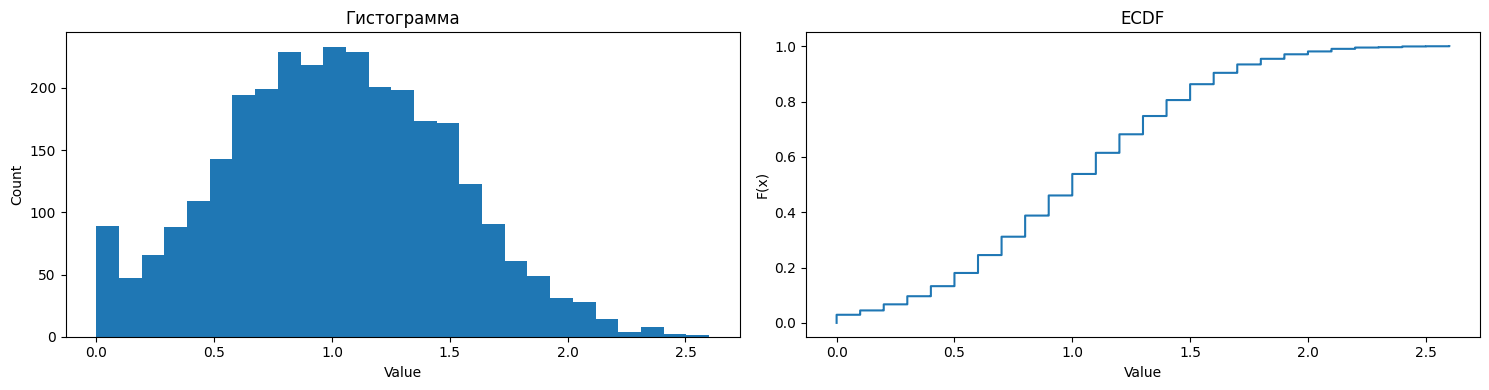

n         : 3000
mean      : 1.0067333333333335
var       : 0.24284799555555553
median    : 1.0
mode      : [1.0]
q25       : 0.7
q50       : 1.0
q75       : 1.4
iqr       : 0.7
skew      : 0.09837930491958932
kurt      : -0.35033868704647286


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

dt = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv") 
col = dt["Screen_Time_Before_Bed"]

def compute_basic_stats(x):
    x = np.asarray(x, dtype=float)
    n = len(x)
    mean = x.mean()
    var_pop = x.var(ddof=0)
    median = np.median(x)
    mode_vals = pd.Series(x).mode().tolist()
    q25, q50, q75 = np.percentile(x, [25,50,75])
    iqr = q75 - q25
    skew = stats.skew(x)
    kurt = stats.kurtosis(x)

    return {
        "n": n, "mean": mean, "var": var_pop, "median": median,
        "mode": mode_vals, "q25": q25, "q50": q50, "q75": q75,
        "iqr": iqr, "skew": skew, "kurt": kurt
    }
    
def plot_hist_ecdf(x, title_prefix=""):
    fig, axs = plt.subplots(1,2, figsize=(15,4))
    axs[0].hist(x, bins='auto')
    axs[0].set_title(f"{title_prefix}Гистограмма")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Count")
    
    sorted_x = np.sort(x)
    y_ecdf = np.arange(1, len(x)+1) / len(x)
    
    axs[1].step(sorted_x, y_ecdf, where='post')
    axs[1].set_title(f"{title_prefix}ECDF")
    axs[1].set_xlabel("Value")
    axs[1].set_ylabel("F(x)")
    
    plt.tight_layout()
    plt.show()

plot_hist_ecdf(col)

basic_stats = compute_basic_stats(col)

for k, v in basic_stats.items():
    print(f"{k:10}: {v}")


- среднее, медиана и мода почти совпадают (1.0067 vs 1.0) -> распределение примерно симметрично по центру (нет сильного смещения центра).

- SD ≈ 0.493 - относительно небольшой разброс вокруг 1.0; 

- IQR = 0.7 значит, что средние 50% наблюдений лежат в интервале длиной 0.7 (от 0.7 до 1.4).

- Асимметрия ≈ 0.098 - малая положительная асимметрия (слегка длиннее правый хвост).

- Эксцесс ≈ −0.350 - отрицательный эксцесс -> распределение плосковатее нормального (меньше пик и/или более тонкие хвосты), т.е. немного "плоский" по сравнению с нормалью.

Гистограмма: форма близка к колоколообразной с максимумом близко к 1.0. Есть заметный левый край около нуля и небольшой правый хвост.

ECDF: постепенный рост от 0 до 1, кривая примерно S-образная. По ECDF видно, где лежат квартильные значения (Q1≈0.7, Q2≈1.0, Q3≈1.4) - например, около 75% значений <= 1.4.

Вместе графики подтверждают: распределение близко к симметричному, но с небольшой правой асимметрией и с более плоской формой, чем у идеальной нормали.

# II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

### 1. Тест Хи-квадрат

Тест Хи-квадрат проверяет, насколько хорошо наблюдаемые частоты соответствуют ожидаемым частотам нормального распределения.


1. Разбиваем числовую ось на $k$ интервалов (бинов) с границами $a_0=-\infty<a_1<\dots<a_k=\infty$.
2. Для каждого интервала $i$ считаем:

   * наблюдаемую частоту $O_i$ (сколько точек попало в интервал),
   * ожидаемую вероятность $p_i = \Phi\!\big(\tfrac{a_i-\hat\mu}{\hat\sigma}\big) - \Phi\!\big(\tfrac{a_{i-1}-\hat\mu}{\hat\sigma}\big)$, где $\Phi$ — стандартная нормальная функция распределения,
   * ожидаемую частоту $E_i = n p_i$.
3. Вычисляем статистику:

$$
\chi^2 = \sum_{i=1}^{m} \frac{(O_i - E_i)^2}{E_i},
$$

где $m$ — число интервалов после объединения.
4\. Степени свободы: $\nu = m - r - 1$, где $r$ — число оценённых параметров распределения (для нормали: $r=2$, $\mu$ и $\sigma$).
5\. P-значение: $p = 1 - F_{\chi^2}(\chi^2;\nu)$ — правая область распределения χ². Если $p$ мало (обычно $<0.05$), отклоняем $H_0$.


In [3]:
def chi_square_normality_test(data, alpha=0.05, bins=10, min_expected=5):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=0)
    
    min_val = np.min(data)
    max_val = np.max(data)
    bin_edges = np.linspace(min_val - 1e-8, max_val + 1e-8, bins + 1)

    observed, _ = np.histogram(data, bins=bin_edges)
    
    expected = np.zeros(bins)
    for i in range(bins):
        # Вероятность попадания в интервал [bin_edges[i], bin_edges[i+1])
        prob = (stats.norm.cdf(bin_edges[i+1], mean, std) - stats.norm.cdf(bin_edges[i], mean, std))
        expected[i] = prob * n
    
    # Объединяем бины с малыми ожидаемыми частотами
    obs = observed.astype(float).tolist()
    exp = expected.astype(float).tolist()
    edg = bin_edges.tolist()

    def merge_bins(i, j):
        obs[i] += obs[j]
        exp[i] += exp[j]
        del obs[j]; del exp[j]; del edg[j+1]

    while True:
        small_idxs = [k for k, val in enumerate(exp) if val < min_expected]
        if not small_idxs or len(exp) == 1:
            break
        k = small_idxs[0]
        if k == 0:
            merge_bins(0, 1)
        elif k == len(exp)-1:
            merge_bins(k-1, k)
        else:
            if exp[k-1] < exp[k+1]:
                merge_bins(k-1, k)
            else:
                merge_bins(k, k+1)
        
    obs = np.array(obs); exp = np.array(exp)
    k_final = len(obs)
    
    print(f"observed: {obs}")
    print(f"expected: {exp}")
    print(f"Number of bins after merging: {k_final}")
    
    chi2_stat = np.sum((obs - exp)**2 / exp)

    df = k_final - 1 - 2
    
    # Критическое значение
    critical_value = stats.chi2.ppf(1 - alpha, df)
    
    # p-значение
    p_value = stats.chi2.sf(chi2_stat, df) # 1 - stats.chi2.cdf(chi2_stat, df)
    
    # Решение
    decision = "Отвергаем H0" if chi2_stat > critical_value else "Не отвергаем H0"
    
    return {
        "chi2": chi2_stat,
        "pvalue": p_value,
        "critical_value": critical_value,
        "decision": decision,
        "df": df
    }


chi2res = chi_square_normality_test(col, 0.05, 15)

print("=== ТЕСТ ХИ-КВАДРАТ ===")
print(f"Статистика Хи-квадрат: {chi2res["chi2"]:.4f}")
print(f"Степени свободы: {chi2res["df"]}")
print(f"Критическое значение (α=0.05): {chi2res["critical_value"]:.4f}")
print(f"p-значение: {chi2res["pvalue"]:.4f}")
print(f"Решение: {chi2res["decision"]}")
print(f"Уровень значимости: 0.05")


observed: [136. 154. 252. 194. 428. 451. 430. 198. 345. 214. 110.  31.  42.  15.]
expected: [ 74.61420409 134.43765201 214.30612595 302.24953673 377.15200634
 416.37862697 406.70764771 351.47787519 268.74128699 181.79825724
 108.8081238   57.61635433  26.99223628  15.28989561]
Number of bins after merging: 14
=== ТЕСТ ХИ-КВАДРАТ ===
Статистика Хи-квадрат: 224.8365
Степени свободы: 11
Критическое значение (α=0.05): 19.6751
p-значение: 0.0000
Решение: Отвергаем H0
Уровень значимости: 0.05


наблюдаемые частоты сильно отклоняются от того, что ожидалось бы при нормальном распределении с параметрами, оценёнными по выборке. Большие вклады приходят от крайних и некоторых центральных бинов, это говорит не о случайном шуме, а о системном отличии формы распределения от нормальной.

### 2. Тест асимметрии и эксцесса

**Апроксимация распределений статистик** (асимптотическая, при большом n):

* приближённое стандартное отклонение асимметрии:

$$
\operatorname{SE}_{\text{skew}}\approx\sqrt{\frac{6}{n}}.
$$

* приближённое стандартное отклонение эксцесса:

$$
\operatorname{SE}_{\text{kurt}}\approx\sqrt{\frac{24}{n}}.
$$

Тогда z-статистики:

$$
z_{\text{skew}}=\frac{g_1}{\operatorname{SE}_{\text{skew}}},\qquad
z_{\text{kurt}}=\frac{g_2}{\operatorname{SE}_{\text{kurt}}}.
$$

P-значения: двухсторонние $p=2(1-\Phi(|z|))$. Если p маленькое — значимая асимметрия/эксцесс → данные не нормальны.


In [4]:


def skewness_kurtosis_normality_test(data):
    n = len(data) 
    
    skeww = stats.skew(data)
    kurtosis = stats.kurtosis(data)
    
    # Статистика для асимметрии (асимптотически нормальная)
    z_skew = skeww / np.sqrt(6.0 / n)
    p_skew = 2.0 * (1.0 - stats.norm.cdf(abs(z_skew)))
    
    # Статистика для эксцесса (асимптотически нормальная)
    z_kurt = kurtosis / np.sqrt(24.0 / n)
    p_kurt = 2.0 * (1.0 - stats.norm.cdf(abs(z_kurt)))      
    
    return {
        "skew": skeww,
        "skew_p": p_skew,
        "kurt": kurtosis,
        "kurt_p": p_kurt
    }

# Применяем тест к данным
sk_kt = skewness_kurtosis_normality_test(col)

print("=== ТЕСТ АСИММЕТРИИ И ЭКСЦЕССА ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ ===")
print(f"Асимметрия: {basic_stats["skew"]:.4f}")
print(f"Статистика асимметрии: {sk_kt["skew"]:.4f}")
print(f"p-значение асимметрии: {sk_kt["skew_p"]:.4f}")
print()
print(f"Эксцесс: {basic_stats["kurt"]:.4f}")
print(f"Статистика эксцесса: {sk_kt["kurt"]:.4f}")
print(f"p-значение эксцесса: {sk_kt["kurt_p"]:.4f}")



=== ТЕСТ АСИММЕТРИИ И ЭКСЦЕССА ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ ===
Асимметрия: 0.0984
Статистика асимметрии: 0.0984
p-значение асимметрии: 0.0278

Эксцесс: -0.3503
Статистика эксцесса: -0.3503
p-значение эксцесса: 0.0001


Асимметрия: численно мала - распределение почти симметрично, но при большом n эта малая асимметрия статистически значима (p≈0.028 < 0.05).

Эксцесс: отрицательный и статистически очень значим - распределение плосковато (меньше пика/иногда тоньше хвосты) по сравнению с нормальным.

### 3. Q-Q plot (квантиль-квантиль график)

Q-Q plot сравнивает квантили данных с квантилями нормального распределения. Если данные нормальны, точки должны лежать на прямой линии.


=== Q-Q PLOT ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ ===


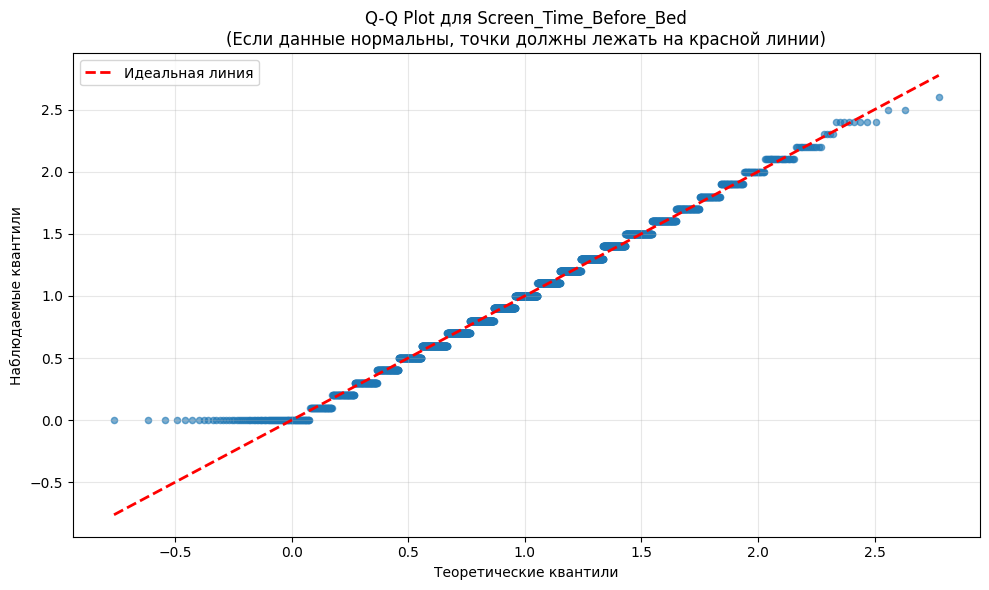

In [5]:
# Q-Q plot для проверки нормальности
def qq_plot(data, title="Q-Q Plot"):
    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    # Вычисляем теоретические квантили
    # Используем формулу (i - 0.5) / n для i-го квантиля
    theoretical_quantiles = stats.norm.ppf((np.arange(1, n + 1) - 0.5) / n, data.mean(), np.sqrt(data.var()))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.6, s=20)
    
    min_val = min(np.min(theoretical_quantiles), np.min(sorted_data))
    max_val = max(np.max(theoretical_quantiles), np.max(sorted_data))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Идеальная линия')
    
    # Настраиваем график
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Наблюдаемые квантили')
    plt.title(f'{title}\n(Если данные нормальны, точки должны лежать на красной линии)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Создаем Q-Q plot
print("=== Q-Q PLOT ДЛЯ ПРОВЕРКИ НОРМАЛЬНОСТИ ===")
qq_plot(col, "Q-Q Plot для Screen_Time_Before_Bed")


Центральные квантилли лежат близко к линии (центр похож на нормаль), но концовые квантилли отклоняются - особенно в левом крае (скопление нулей) и немного на правом хвосте.

# III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов

**Идея.** Удаление - полностью убрать наблюдения, признанные выбросами. Усечение (winsorizing) - заменить экстремальные значения на крайние допустимые (например, заменить всё ниже Q1−1.5·IQR на Q1−1.5·IQR, и всё выше Q3+1.5·IQR на Q3+1.5·IQR).

**Почему:** выбросы сильно влияют на среднее, дисперсию, дисперсионные показатели (skew/kurt), а иногда мешают тестам нормальности.

**Как определить:** классическое правило: границы = \[Q1 − 1.5·IQR, Q3 + 1.5·IQR]. Можно задавать более жёсткие/мягкие пороги.

**Эффект:**

* Удаление снижает влияние выбросов, но уменьшает n; может сместить распределение, если выбросы не «ошибки».
* Усечение сохраняет n, уменьшает влияние экстремумов, часто «мягче» меняет статистики.

**Когда применять:** если есть явные ошибки/опечатки (напр., 999 вместо 99) — удалять/корректировать. Если выбросы реальны, лучше усечь, чтобы не терять данных.

2. Стандартизация, нормировка
**Стандартизация (z-score):**

$$
z_i = \frac{x_i - \bar x}{s}
$$

где $s$ — стандартное отклонение.

**Нормировка (min-max):**

$$
x'_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}
$$

переводит в диапазон \[0,1].

**Почему:** эти преобразования меняют масштаб, но не форму распределения (монотонная аффинная трансформация). Стандартизация делает среднее 0 и sd=1 - удобно для сравнения между группами и для алгоритмов; нормировка - удобно для визуализации/ML. 
**Важно:** они не делают ненормальное распределение нормальным - они лишь меняют центр/масштаб.

3. Логарифмирование и т.п.

**Формула**:

$$
y_i = \log(x_i + c)
$$

где $c\ge0$ — сдвиг для обработки нулей.

**Почему:** логарифм сжимает правые хвосты, уменьшает асимметрию вправо (правосторонняя асимметрия), часто делает распределение ближе к нормальному если исходные данные положительные и имеют «длинный правый хвост».

**Эффект:** уменьшает skew>0 и kurt (может снизить heavy tails). Работает только для положительных (или с положительным сдвигом) данных. После логарифма можно дополнительно стандартизовать.

Выполните пункты I и II для обработанных данных

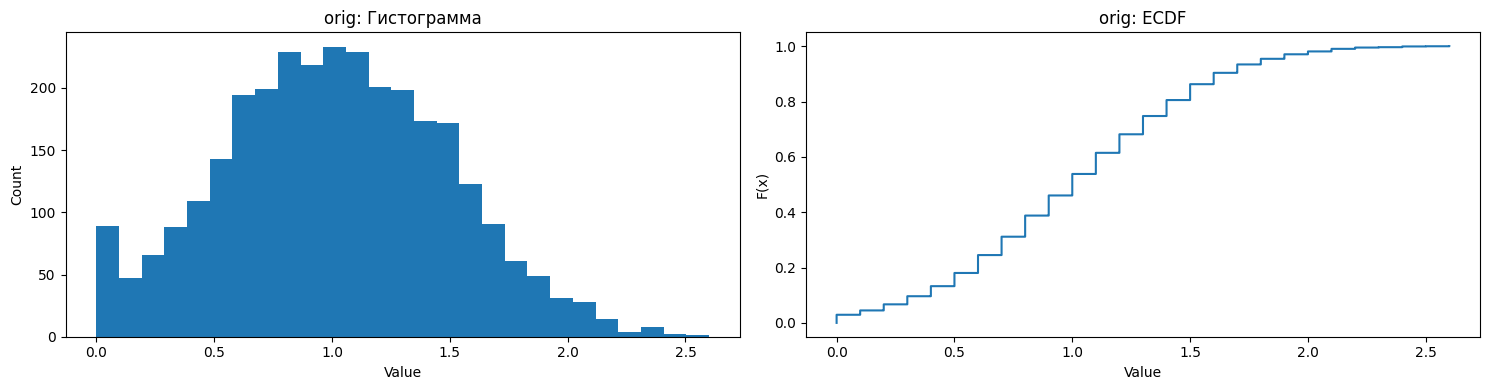

observed: [136. 154. 252. 194. 428. 451. 430. 198. 345. 214. 110.  31.  42.  15.]
expected: [ 74.61420409 134.43765201 214.30612595 302.24953673 377.15200634
 416.37862697 406.70764771 351.47787519 268.74128699 181.79825724
 108.8081238   57.61635433  26.99223628  15.28989561]
Number of bins after merging: 14


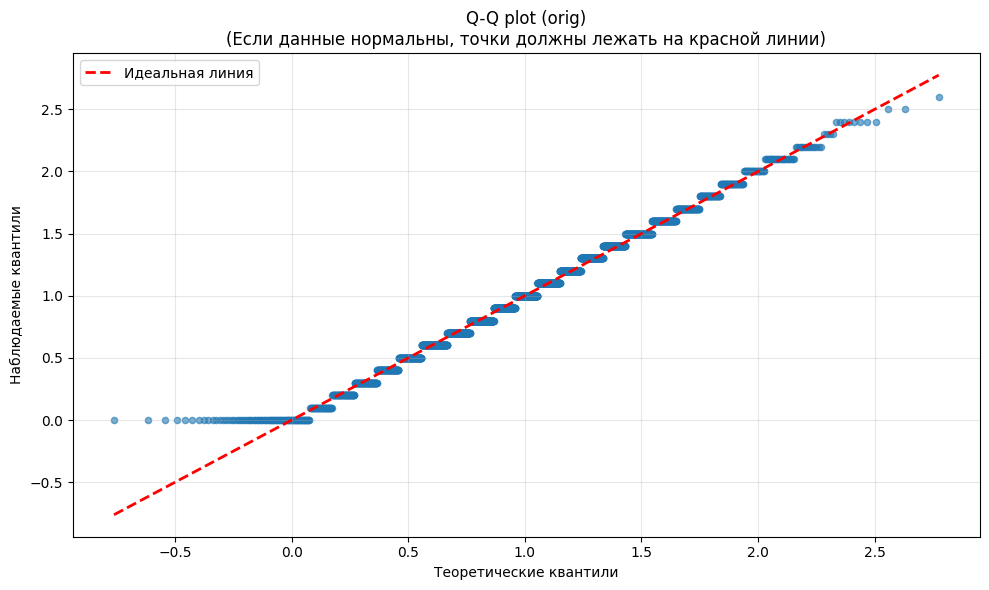


Версия: orig — исходные данные
n = 3000
mean = 1.0067, var = 0.2428, median = 1.0000
q25 = 0.7000, q50 = 1.0000, q75 = 1.4000, iqr = 0.7000
skew = 0.0984, kurt (excess) = -0.3503
Chi2: stat=224.8365, df=11, p=0.0000, decision=Отвергаем H0
Skew p = 0.0278, Kurt p = 0.0001


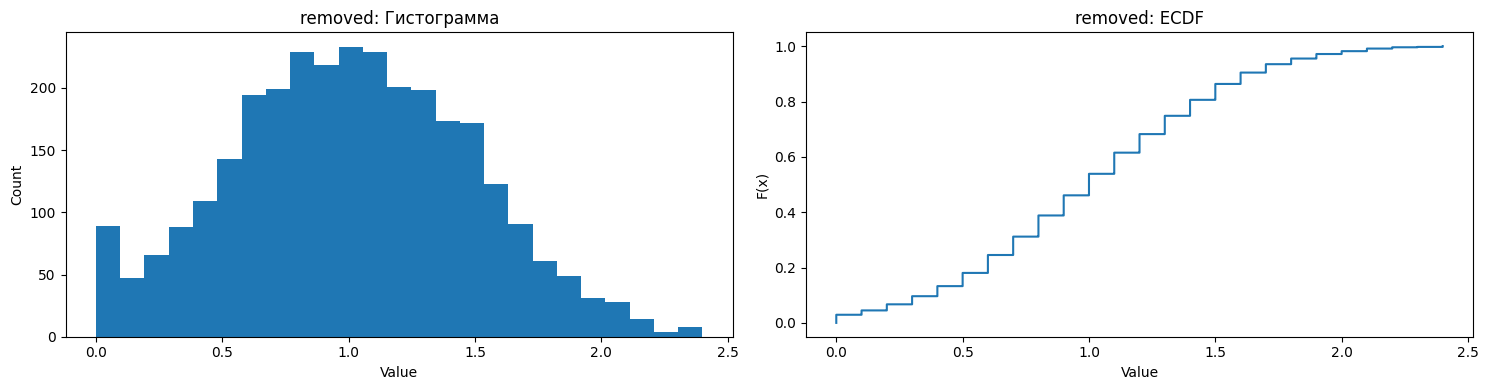

observed: [136. 154. 109. 337. 199. 447. 462. 201. 371. 295.  91. 110.  31.  42.
  12.]
expected: [ 66.63985347 116.28862368 182.62626415 258.11543509 328.31516275
 375.83322359 387.19277756 358.99409553 299.55392527 224.95186138
 152.03017622  92.46853083  50.61508261  24.93361415  11.0536792 ]
Number of bins after merging: 15


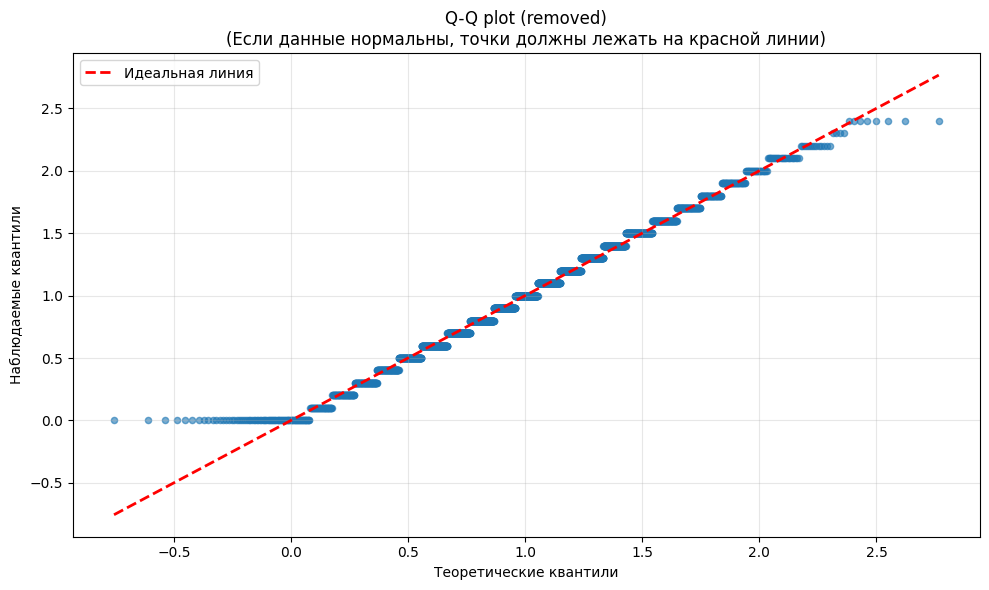


Версия: removed — удалены 3 выбросов (IQR, k=1.5), bounds=(-0.350,2.450)
n = 2997
mean = 1.0052, var = 0.2408, median = 1.0000
q25 = 0.7000, q50 = 1.0000, q75 = 1.4000, iqr = 0.7000
skew = 0.0789, kurt (excess) = -0.3948
Chi2: stat=372.6490, df=12, p=0.0000, decision=Отвергаем H0
Skew p = 0.0779, Kurt p = 0.0000


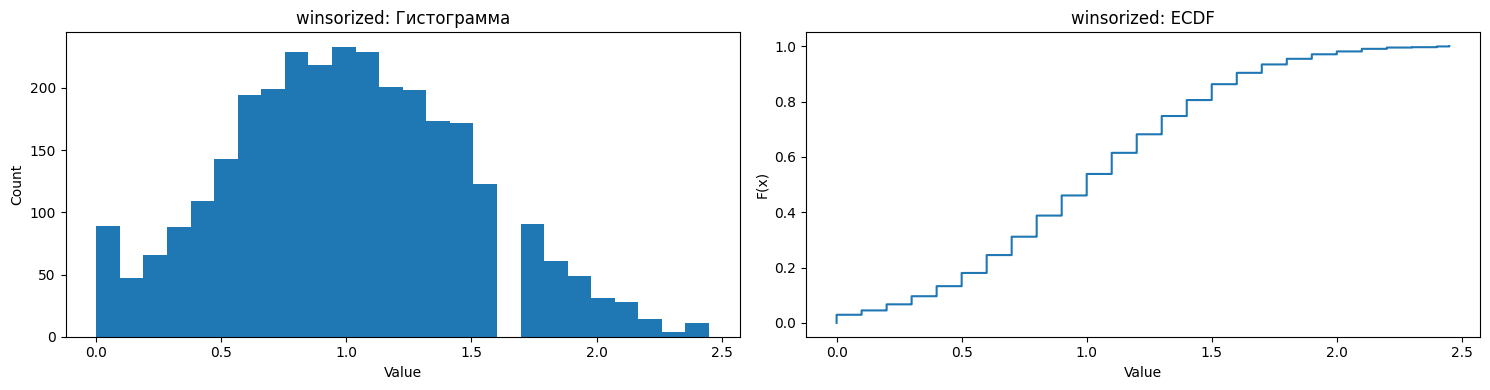

observed: [136. 154. 109. 337. 428. 218. 462. 399. 173. 295.  91. 110.  59.  14.
  15.]
expected: [ 68.83549351 120.82463716 190.18266396 268.44842109 339.80277557
 385.71831192 392.63722202 358.41868333 293.40488145 215.38754934
 141.79109175  83.70480897  44.312118    21.03595756   8.95501501]
Number of bins after merging: 15


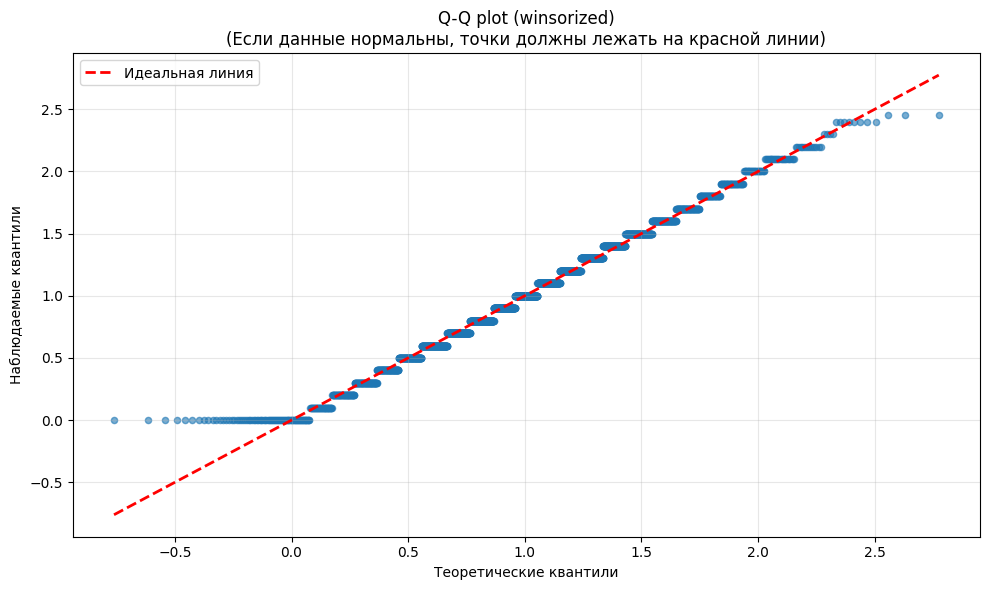


Версия: winsorized — winsorized: 3 значений усечены к границам (-0.350,2.450)
n = 3000
mean = 1.0067, var = 0.2426, median = 1.0000
q25 = 0.7000, q50 = 1.0000, q75 = 1.4000, iqr = 0.7000
skew = 0.0943, kurt (excess) = -0.3639
Chi2: stat=356.0646, df=12, p=0.0000, decision=Отвергаем H0
Skew p = 0.0349, Kurt p = 0.0000


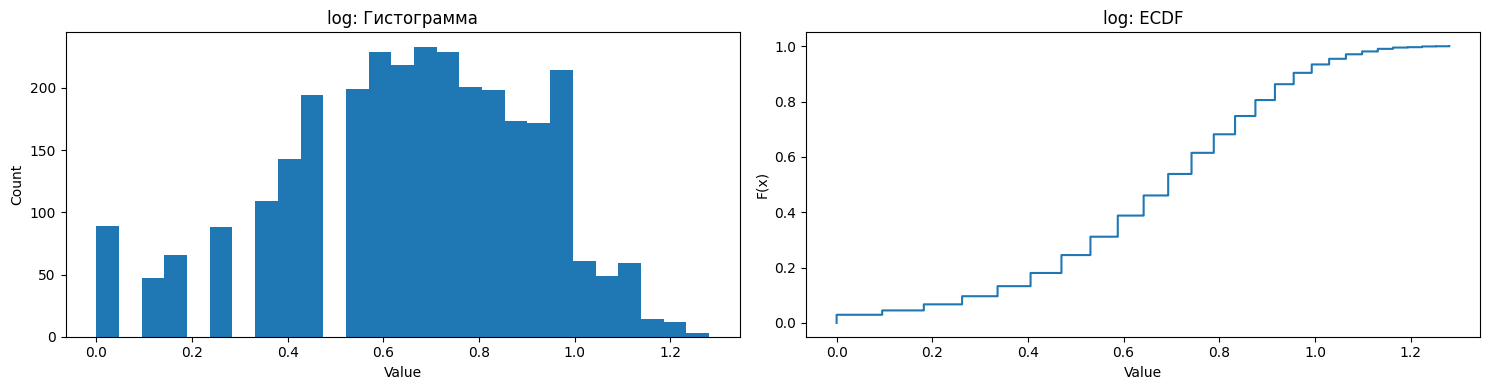

observed: [ 89.  47.  66. 197. 143. 194. 428. 218. 462. 399. 345. 214. 141.  46.
  11.]
expected: [ 23.10933845  47.66448386  88.35107781 147.17738782 220.33569998
 296.44558661 358.44520963 389.51043808 380.39458278 333.86303963
 263.34226715 186.67662355 118.92547742  68.0884526   35.03347045]
Number of bins after merging: 15


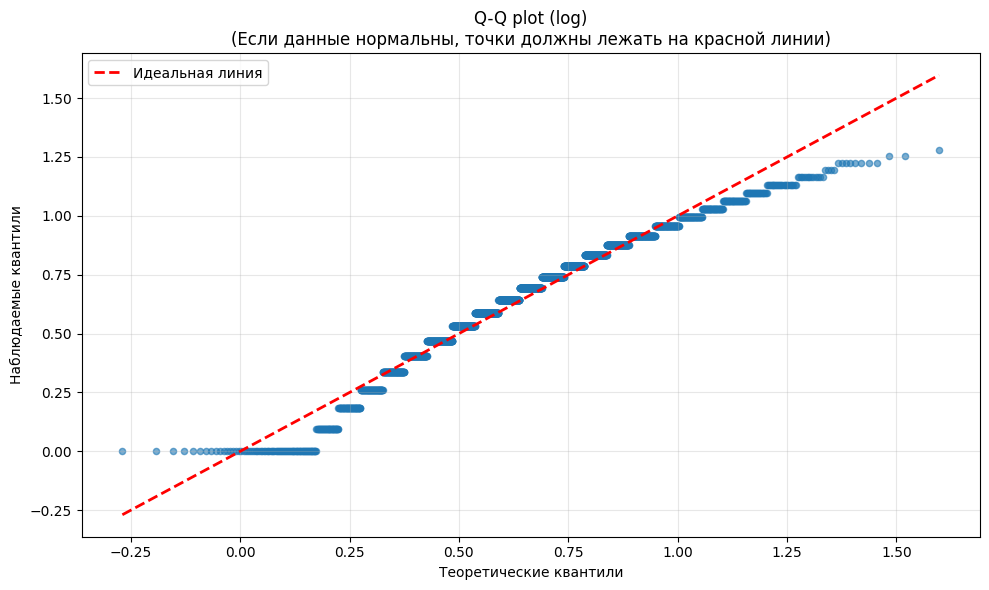


Версия: log — log(x+1.0)
n = 3000
mean = 0.6642, var = 0.0677, median = 0.6931
q25 = 0.5306, q50 = 0.6931, q75 = 0.8755, iqr = 0.3448
skew = -0.5328, kurt (excess) = -0.0381
Chi2: stat=449.2501, df=12, p=0.0000, decision=Отвергаем H0
Skew p = 0.0000, Kurt p = 0.6705


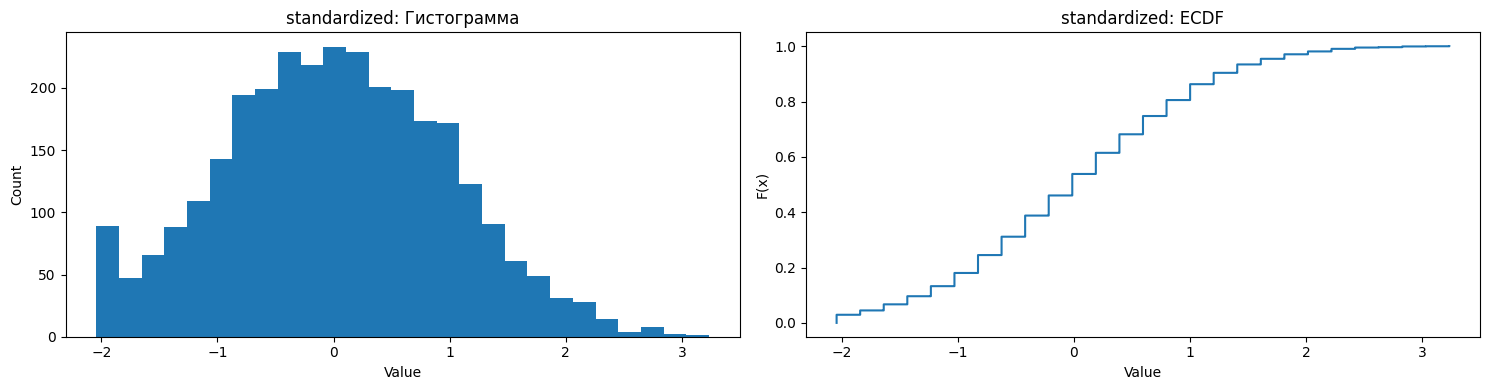

observed: [136. 154. 252. 194. 428. 451. 430. 198. 345. 214. 110.  31.  42.  15.]
expected: [ 74.61420512 134.43765314 214.3061268  302.24953689 377.15200559
 416.37862549 406.70764601 351.47787383 268.74128629 181.79825717
 108.8081241   57.61635473  26.9922366   15.28989592]
Number of bins after merging: 14


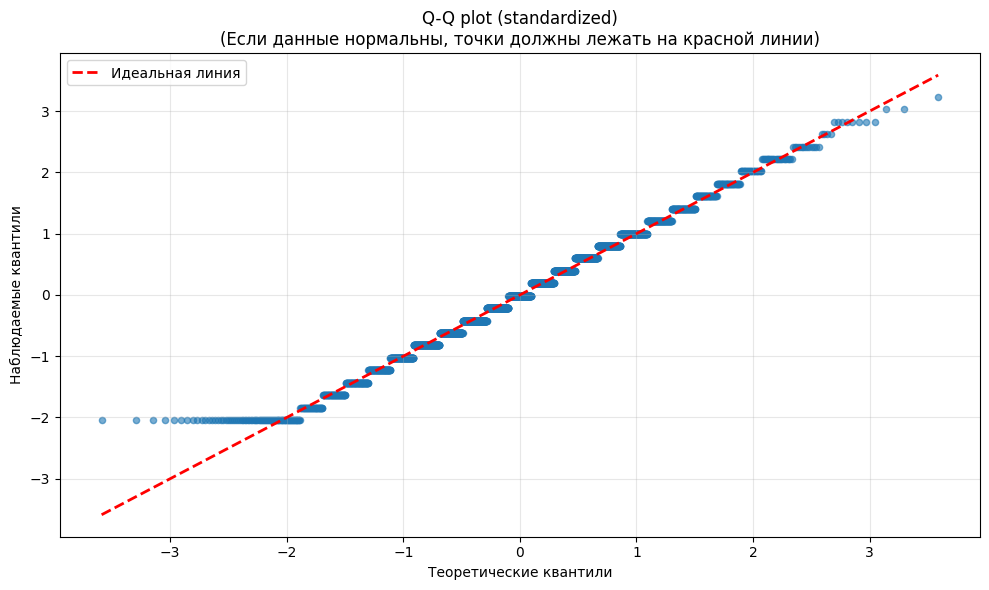


Версия: standardized — z-score (ddof=1)
n = 3000
mean = -0.0000, var = 0.9997, median = -0.0137
q25 = -0.6223, q50 = -0.0137, q75 = 0.7979, iqr = 1.4202
skew = 0.0984, kurt (excess) = -0.3503
Chi2: stat=224.8365, df=11, p=0.0000, decision=Отвергаем H0
Skew p = 0.0278, Kurt p = 0.0001


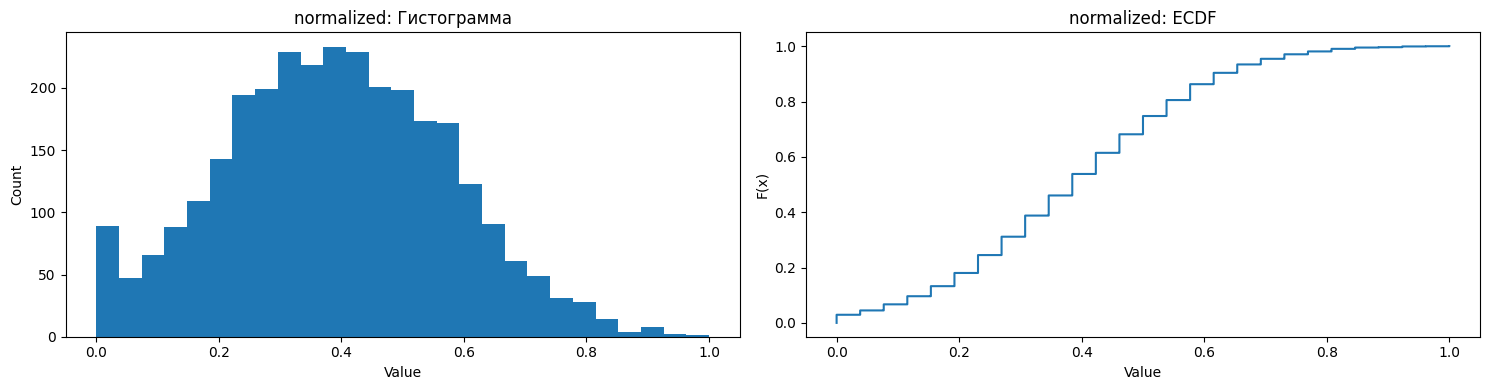

observed: [136. 154. 252. 194. 428. 451. 430. 198. 345. 214. 110.  31.  42.  15.]
expected: [ 74.61420086 134.43764845 214.30612325 302.24953623 377.15200871
 416.37863166 406.70765309 351.47787949 268.7412892  181.79825747
 108.80812286  57.61635309  26.99223527  15.28989466]
Number of bins after merging: 14


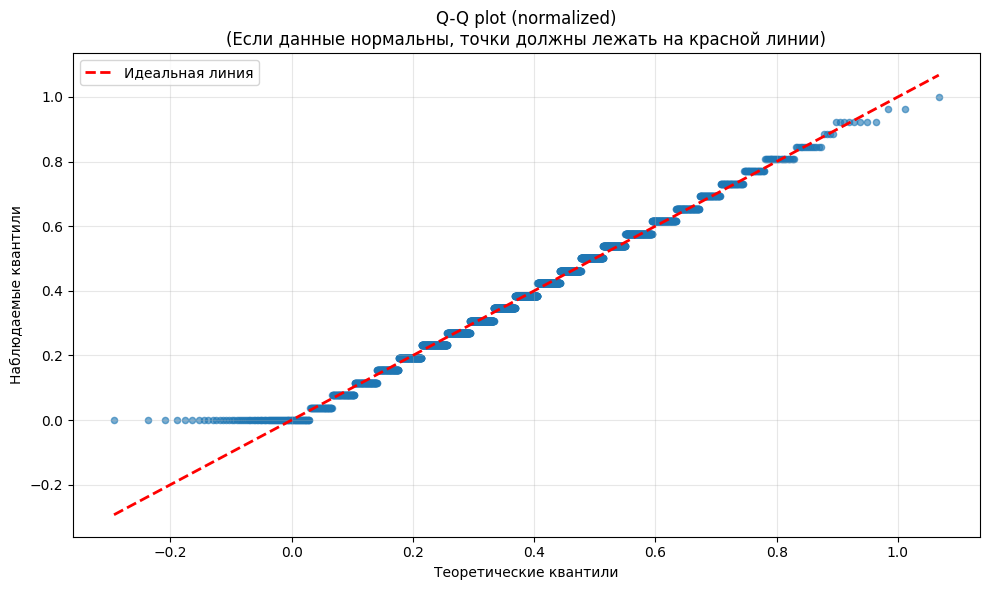


Версия: normalized — min-max в [0,1]
n = 3000
mean = 0.3872, var = 0.0359, median = 0.3846
q25 = 0.2692, q50 = 0.3846, q75 = 0.5385, iqr = 0.2692
skew = 0.0984, kurt (excess) = -0.3503
Chi2: stat=224.8365, df=11, p=0.0000, decision=Отвергаем H0
Skew p = 0.0278, Kurt p = 0.0001


,name,n,mean,var,median,mode,q25,q50,q75,iqr,skew,kurt,chi2_stat,chi2_df,chi2_p,chi2_decision,skew_p,kurt_p,note
0,orig,3000,1.006733e+00,0.242848,1.000000,[1.0],0.700000,1.000000,1.400000,0.700000,0.098379,-0.350339,224.836469,11,5.068354e-42,Отвергаем H0,0.027819,0.000090,исходные данные
1,removed,2997,1.005205e+00,0.240754,1.000000,[1.0],0.700000,1.000000,1.400000,0.700000,0.078874,-0.394758,372.649037,12,2.313166e-72,Отвергаем H0,0.077934,0.000010,"удалены 3 выбросов (IQR, k=1.5), bounds=(-0.35..."
2,winsorized,3000,1.006650e+00,0.242598,1.000000,[1.0],0.700000,1.000000,1.400000,0.700000,0.094338,-0.363913,356.064648,12,7.364736e-69,Отвергаем H0,0.034904,0.000047,winsorized: 3 значений усечены к границам (-0....
3,log,3000,6.642287e-01,0.067672,0.693147,[0.6931471805599453],0.530628,0.693147,0.875469,0.344840,-0.532815,-0.038058,449.250051,12,1.362800e-88,Отвергаем H0,0.000000,0.670474,log(x+1.0)
4,standardized,3000,-2.978358e-16,0.999667,-0.013661,[-0.013661250619000745],-0.622331,-0.013661,0.797898,1.420229,0.098379,-0.350339,224.836467,11,5.068361e-42,Отвергаем H0,0.027819,0.000090,z-score (ddof=1)
5,normalized,3000,3.872051e-01,0.035924,0.384615,[0.3846153846153846],0.269231,0.384615,0.538462,0.269231,0.098379,-0.350339,224.836479,11,5.068332e-42,Отвергаем H0,0.027819,0.000090,"min-max в [0,1]"


In [6]:


col = pd.Series(col).dropna().astype(float)


def detect_iqr_outliers(series, k=1.5):
    """Возвращает булев массив (True для выброса) по правилу IQR."""
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    
    return (series < lower) | (series > upper), lower, upper

def remove_outliers_iqr(series, k=1.5):
    mask, lower, upper = detect_iqr_outliers(series, k=k)
    return series[~mask].copy(), mask.sum(), lower, upper

def winsorize_iqr(series, k=1.5):
    mask, lower, upper = detect_iqr_outliers(series, k=k)
    s = series.copy()
    s[s < lower] = lower
    s[s > upper] = upper
    return s, mask.sum(), lower, upper

def safe_log(series, shift=None):
    s = series.copy()
    minval = s.min()
    if shift is None:
        shift = 1.0 if minval <= 0 else 0.0
    return np.log(s + shift), shift

def standardize(series, ddof=1):
    mu = series.mean()
    sd = series.std(ddof=ddof)
    return (series - mu) / sd

def minmax_normalize(series):
    mn = series.min()
    mx = series.max()
    if mx == mn:
        return series - mn  # все нули
    return (series - mn) / (mx - mn)

results = {} 

results['orig'] = {'data': col, 'note': 'исходные данные'}

# Удаление выбросов
removed, n_removed, low, high = remove_outliers_iqr(col, k=1.5)
results['removed'] = {'data': removed, 'note': f'удалены {n_removed} выбросов (IQR, k=1.5), bounds=({low:.3f},{high:.3f})'}

# Усечение (winsorize)
wins, n_wins, low, high = winsorize_iqr(col, k=1.5)
results['winsorized'] = {'data': wins, 'note': f'winsorized: {n_wins} значений усечены к границам ({low:.3f},{high:.3f})'}

# Логарифмирование
logged, shift_used = safe_log(col, shift=None)
results['log'] = {'data': pd.Series(logged, index=col.index), 'note': f'log(x+{shift_used})'}

# Стандартизация
results['standardized'] = {'data': standardize(col, ddof=1), 'note': 'z-score (ddof=1)'}

# Нормировка min-max
results['normalized'] = {'data': minmax_normalize(col), 'note': 'min-max в [0,1]'}

def analyze_version(name, series):
    s = pd.Series(series).dropna().astype(float)
    
    if len(s)==0:
        return {'error': 'no data after cleaning'}
    
    basic = compute_basic_stats(s) 
    
    plot_hist_ecdf(s, title_prefix=f"{name}: ")
    
    chi2 = chi_square_normality_test(s, alpha=0.05, bins=15, min_expected=5)
    skkt = skewness_kurtosis_normality_test(s)
    
    qq_plot(s, title=f"Q-Q plot ({name})")
    
    summary = {
        'name': name,
        'n': basic.get('n', len(s)),
        'mean': basic.get('mean'),
        'var': basic.get('var'),
        'median': basic.get('median'),
        'mode': basic.get('mode'),
        'q25': basic.get('q25'),
        'q50': basic.get('q50'),
        'q75': basic.get('q75'),
        'iqr': basic.get('iqr'),
        'skew': basic.get('skew'),
        'kurt': basic.get('kurt'),
        'chi2_stat': chi2.get('chi2'),
        'chi2_df': chi2.get('df'),
        'chi2_p': chi2.get('pvalue'),
        'chi2_decision': chi2.get('decision'),
        'skew_p': skkt.get('skew_p'),
        'kurt_p': skkt.get('kurt_p'),
        'note': results[name]['note']
    }

    print("\n" + "="*40)
    print(f"Версия: {name} — {results[name]['note']}")
    print(f"n = {summary['n']}")
    print(f"mean = {summary['mean']:.4f}, var = {summary['var']:.4f}, median = {summary['median']:.4f}")
    print(f"q25 = {summary['q25']:.4f}, q50 = {summary['q50']:.4f}, q75 = {summary['q75']:.4f}, iqr = {summary['iqr']:.4f}")
    print(f"skew = {summary['skew']:.4f}, kurt (excess) = {summary['kurt']:.4f}")
    print(f"Chi2: stat={summary['chi2_stat']:.4f}, df={summary['chi2_df']}, p={summary['chi2_p']:.4f}, decision={summary['chi2_decision']}")
    print(f"Skew p = {summary['skew_p']:.4f}, Kurt p = {summary['kurt_p']:.4f}")

    return summary

summaries = []
for name, meta in results.items():
    try:
        summ = analyze_version(name, meta['data'])
    except Exception as e:
        print(f"Ошибка при анализе {name}: {e}")
        summ = {'name': name, 'error': str(e)}
    summaries.append(summ)

df_summary = pd.DataFrame([s for s in summaries])

display(df_summary)


Из всех применённых простых приёмов ни один не привёл к формальной нормальности по χ²: для всех версий χ²-тест даёт огромную статистику и p≈0, H₀ (нормальность) отвергается.
Однако разные методы по-разному влияют на форму (skew / kurt):

Логарифмирование (log(x+1)) заметно уменьшило эксцесс (kurt ≈ −0.038, p≈0.67 -> некритичен), т. е. устранило "плосковатость", но привело к отрицательной асимметрии (skew ≈ −0.533, значимо), и χ² ещё хуже (χ²↑).

Winsorize / удаление 3 выбросов практически не помогли (skew и kurt остались близки к исходным; χ² даже вырос), т.к. выбросов в данных очень мало и они не объясняют системное несоответствие нормали.

Стандартизация / нормировка не меняют форму распределения (skew/kurt непоменялись) - логично: аффинные преобразования не делают ненормальные данные нормальными.

Вывод: простые приёмы (удаление нескольких выбросов, винзоризация, масштабирование) не восстановили нормальности; логарифмирование частично скорректировало одну характеристику (эксцесс), но ухудшило другую (skew) и не сделал данные "нормальными" по χ².

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

Найдено групп: 6 -> ['10th', '11th', '12th', '7th', '8th', '9th']


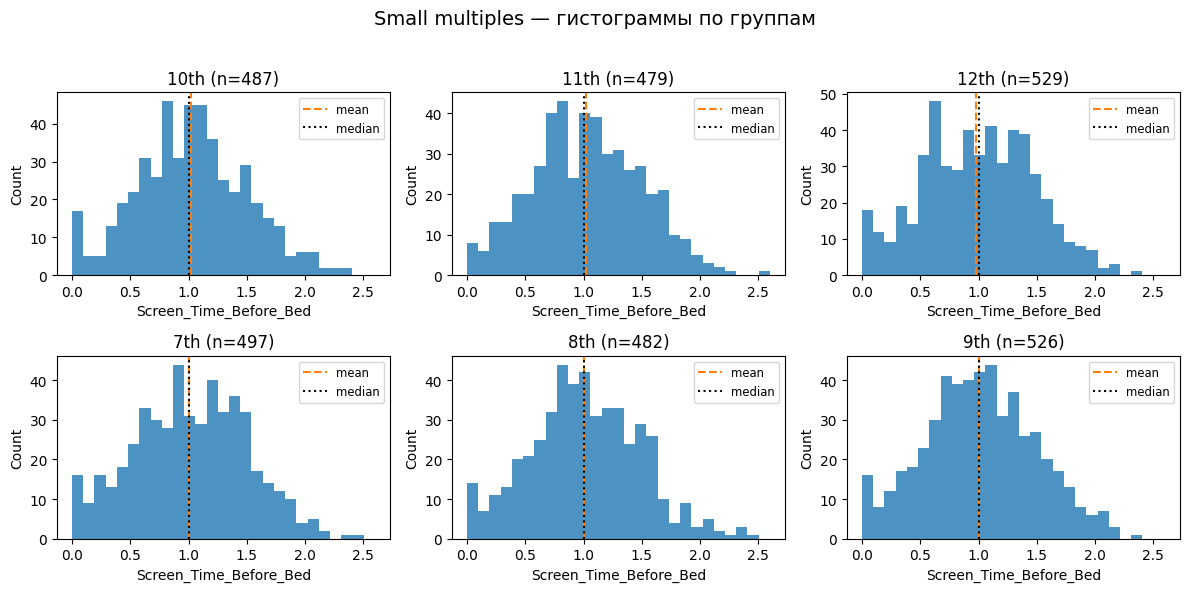

,School_Grade,n,mean,var_ddof
0,10th,487,1.020945,0.240465
1,11th,479,1.022547,0.233020
2,12th,529,0.982420,0.243302
3,7th,497,1.006640,0.254181
4,8th,482,1.005187,0.240865
5,9th,526,1.005133,0.243643


School_Grade   n   mean  var_ddof
        10th 487 1.0209    0.2405
        11th 479 1.0225    0.2330
        12th 529 0.9824    0.2433
         7th 497 1.0066    0.2542
         8th 482 1.0052    0.2409
         9th 526 1.0051    0.2436


In [7]:


series_col = 'Screen_Time_Before_Bed'
group_col = 'School_Grade'

df = dt[[group_col, series_col]].dropna().copy()
df[series_col] = df[series_col].astype(float)

groups = df[group_col].unique()
groups.sort()
n_groups = len(groups)

print(f"Найдено групп: {n_groups} -> {list(groups)}")

all_vals = df[series_col].values
bins = np.histogram_bin_edges(all_vals, bins='auto')  


def plot_small_multiples(df, groups, bins, max_cols=3, figsize_per_ax=(4,3)):
    cols = min(max_cols, len(groups))
    rows = int(np.ceil(len(groups) / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figsize_per_ax[0], rows*figsize_per_ax[1]), squeeze=False)
    axes = axes.flatten()
    for ax_idx, grp in enumerate(groups):
        ax = axes[ax_idx]
        vals = df.loc[df[group_col] == grp, series_col].dropna()
        ax.hist(vals, bins=bins, alpha=0.8)
        ax.set_title(f"{grp} (n={len(vals)})")
        ax.set_xlabel(series_col)
        ax.set_ylabel("Count")

        if len(vals)>0:
            ax.axvline(vals.mean(), color='C1', linestyle='--', label='mean')
            ax.axvline(np.median(vals), color='k', linestyle=':', label='median')
            ax.legend(fontsize='small')

    for j in range(len(groups), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Small multiples — гистограммы по группам", fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()

plot_small_multiples(df, groups, bins, max_cols=3)


summary_rows = []
for grp in groups:
    vals = df.loc[df[group_col]==grp, series_col].dropna().astype(float)
    n = len(vals)
    mean = vals.mean() if n>0 else np.nan
    var_pop = vals.var(ddof=0) if n>0 else np.nan
    summary_rows.append({'School_Grade': grp, 'n': n, 'mean': mean, 'var_ddof': var_pop})
summary_df = pd.DataFrame(summary_rows)
display(summary_df)
print(summary_df.to_string(index=False, float_format='%.4f'))


Все группы очень близки по среднему (~1.00) и по дисперсии (~0.23–0.25). Размеры групп ~480–530 - большие.

1) Что видно визуально

Форма: все гистограммы выглядят очень похоже - пик около 1.0, умеренный правый хвост, заметная масса у нуля/маленьких значений.

Сходства: центры (mean/median/mode) у всех групп примерно совпадают; разбросы визуально сопоставимы.

Различия: тонкие: у 12th возможно чуть больше плотности чуть ниже 1 (mean немного ниже), у 10th/11th - небольшое смещение вправо. Но это визуально очень слабые отличия.

2) Итог 

Все группы School_Grade имеют очень похожие распределения по Screen_Time_Before_Bed: средние значения ≈1.00 и дисперсии ≈0.24. Различия между группами очень малы - то есть практически незначимы. При больших n такие малые различия могут быть статистически значимы, но с точки зрения эффекта на поведение/интерпретацию они малы.